In [1]:
# import packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset 
def xlsx_to_csv_pd():
    data_xls = pd.read_excel('MedicalCentre.xlsx', index_col=0)
    data_xls.to_csv('MedicalCentre.csv', encoding='utf-8')
 
 
if __name__ == '__main__':
    xlsx_to_csv_pd()

data = pd.read_csv('MedicalCentre.csv')

## A. Feature Engineering

### 1. Prepare the data for downstream processes

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*We can see from the above information that there are no missing values.*

### 2. Determine the frequency of distinct values in each feature set 

In [3]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
for i in data.columns:
    print(i+":",data[i].nunique())

PatientId: 62299
AppointmentID: 110527
Gender: 2
ScheduledDay: 103549
AppointmentDay: 27
Age: 104
Neighbourhood: 81
Scholarship: 2
Hipertension: 2
Diabetes: 2
Alcoholism: 2
Handcap: 5
SMS_received: 2
No-show: 2


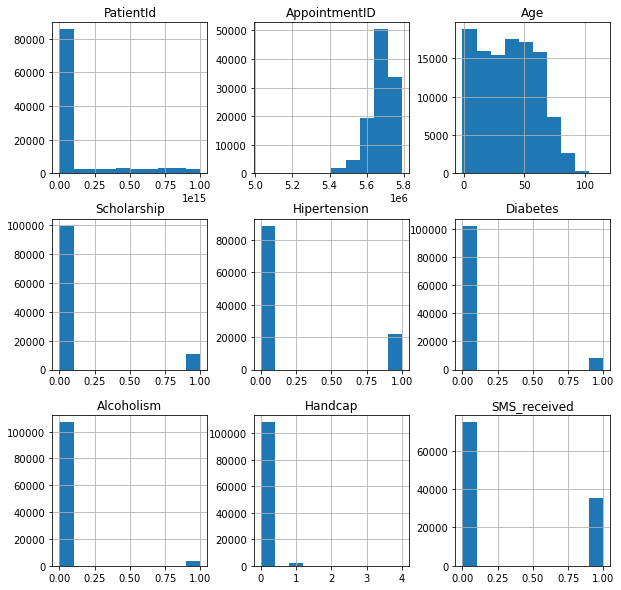

In [5]:
data.hist(bins=10,figsize=(10,10))
plt.show()

### 3. Initialize a function to plot all features within the dataset to visualize for outliers

In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*We have a description about No-show appointments column wise PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received. In the age section, since age cannot be negative, a minimum value of -1 for age is an outlier. In addition, handcap: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used, so not sure if it is an outlier.*

### 4. Count the frequency of negative Age feature observations, and remove them

In [7]:
data[data.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃƒO,0,0,0,0,0,0,No


*We can see that there is only one negative age, so we choose to remove this outlier.*

In [8]:
data= data[data.Age>=0]
print(format(data.Age.unique()))

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


*We can see that the outliers has been removed.*

### 5. The values within AwaitingTime are negative, transform them into positive values

In [9]:
# convert columns types
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

# create AwaitingTime column
data.insert(5,'AwaitingTime',(data.AppointmentDay - data.ScheduledDay).dt.days,allow_duplicates=False) # and convert timedelta to int

# check if the column exists
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,AwaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,35,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,35,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,41,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,41,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
print(format(data.AwaitingTime.unique()))
data.AwaitingTime.value_counts()

[  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127
 111 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95  -6 139
 132 179 117 146 123]


 0      38562
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
 117        1
 146        1
 82         1
-6          1
 127        1
Name: AwaitingTime, Length: 131, dtype: int64

*From the above results, we can see that there are two negative values in AwaitingTime, -1 and -6, which are unreasonable. The number of days should not be negative. The next step will turn these two negative values into positive values.*

In [11]:
# turn two negative values into positive values
data['AwaitingTime']=data['AwaitingTime'].mask(data['AwaitingTime'] == -6, 6)
data['AwaitingTime'] = data['AwaitingTime'].mask(data['AwaitingTime'] == -1, 1)

# check if both become positive
print(format(data.AwaitingTime.unique()))
data.AwaitingTime.value_counts()

[  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127 111
 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95 139 132 179
 117 146 123]


0      38562
2       6725
4       5290
1       5217
7       4906
       ...  
101        1
132        1
151        1
146        1
127        1
Name: AwaitingTime, Length: 129, dtype: int64

### 6. Encode the string categorical values into an integer code

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   AwaitingTime    110526 non-null  int64         
 6   Age             110526 non-null  int64         
 7   Neighbourhood   110526 non-null  object        
 8   Scholarship     110526 non-null  int64         
 9   Hipertension    110526 non-null  int64         
 10  Diabetes        110526 non-null  int64         
 11  Alcoholism      110526 non-null  int64         
 12  Handcap         110526 non-null  int64         
 13  SMS_received    110526 non-null  int64         
 14  No-show         110526 non-null  obj

In [13]:
data= data.rename({ 'No-show': 'No_show'}, axis = 1)

# replace letters in No_show and Gender with numbers 0 and 1.
data.No_show = data.No_show.map({'No': 0, 'Yes': 1})
data.Gender = data.Gender.map({'F': 0, 'M': 1})

data['PatientId']= data['PatientId'].astype('int64')
data['No_show']= data['No_show'].astype('int64')
data['Gender']= data['Gender'].astype('int64')

# check if the replacement was successful
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  int64         
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  int64         
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   AwaitingTime    110526 non-null  int64         
 6   Age             110526 non-null  int64         
 7   Neighbourhood   110526 non-null  object        
 8   Scholarship     110526 non-null  int64         
 9   Hipertension    110526 non-null  int64         
 10  Diabetes        110526 non-null  int64         
 11  Alcoholism      110526 non-null  int64         
 12  Handcap         110526 non-null  int64         
 13  SMS_received    110526 non-null  int64         
 14  No_show         110526 non-null  int

### 7. Break the date features into date components

In [14]:
# expand the ScheduledDay into three columns of year, month and day respectively
data.insert(4,'ScheduledDay_Year',data['ScheduledDay'].dt.year,allow_duplicates=False)
data.insert(5,'ScheduledDay_Month',data['ScheduledDay'].dt.month,allow_duplicates=False)
data.insert(6,'ScheduledDay_Day',data['ScheduledDay'].dt.day,allow_duplicates=False)

# expand the AppointmentDay into three columns of year, month and day respectively
data.insert(8,'AppointmentDay_Year',data['AppointmentDay'].dt.year,allow_duplicates=False)
data.insert(9,'AppointmentDay_Month',data['AppointmentDay'].dt.month,allow_duplicates=False)
data.insert(10,'AppointmentDay_Day',data['AppointmentDay'].dt.day,allow_duplicates=False)

# check if the separation was successful
data

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,AppointmentDay,AppointmentDay_Year,AppointmentDay_Month,...,AwaitingTime,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29,2016,4,29,2016-04-29,2016,4,...,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,0,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,0,2016-05-03,2016,5,3,2016-06-07,2016,6,...,35,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,0,2016-05-03,2016,5,3,2016-06-07,2016,6,...,35,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,0,2016-04-27,2016,4,27,2016-06-07,2016,6,...,41,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,0,2016-04-27,2016,4,27,2016-06-07,2016,6,...,41,38,MARIA ORTIZ,0,0,0,0,0,1,0


### 8. Rescale the age feature with a normalizing

In [15]:
# scale the age values to between 0-1
data.insert(13,'Normalization_Age',(data['Age'] - min(data['Age']))/(max(data['Age']) - min(data['Age'])),allow_duplicates=False)

# check if scaling was successful
data.Normalization_Age.value_counts()

0.000000    3539
0.008696    2273
0.452174    1746
0.426087    1652
0.460870    1651
            ... 
0.852174       6
1.000000       5
0.869565       4
0.886957       2
0.860870       1
Name: Normalization_Age, Length: 103, dtype: int64

In [16]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,AppointmentDay,AppointmentDay_Year,AppointmentDay_Month,...,Age,Normalization_Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,62,0.539130,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29,2016,4,29,2016-04-29,2016,4,...,56,0.486957,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,62,0.539130,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,8,0.069565,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016,4,29,2016-04-29,2016,4,...,56,0.486957,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,0,2016-05-03,2016,5,3,2016-06-07,2016,6,...,56,0.486957,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,0,2016-05-03,2016,5,3,2016-06-07,2016,6,...,51,0.443478,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,0,2016-04-27,2016,4,27,2016-06-07,2016,6,...,21,0.182609,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,0,2016-04-27,2016,4,27,2016-06-07,2016,6,...,38,0.330435,MARIA ORTIZ,0,0,0,0,0,1,0


### 9. Conduct variability comparison between features using a correlation matrix & drop correlated features

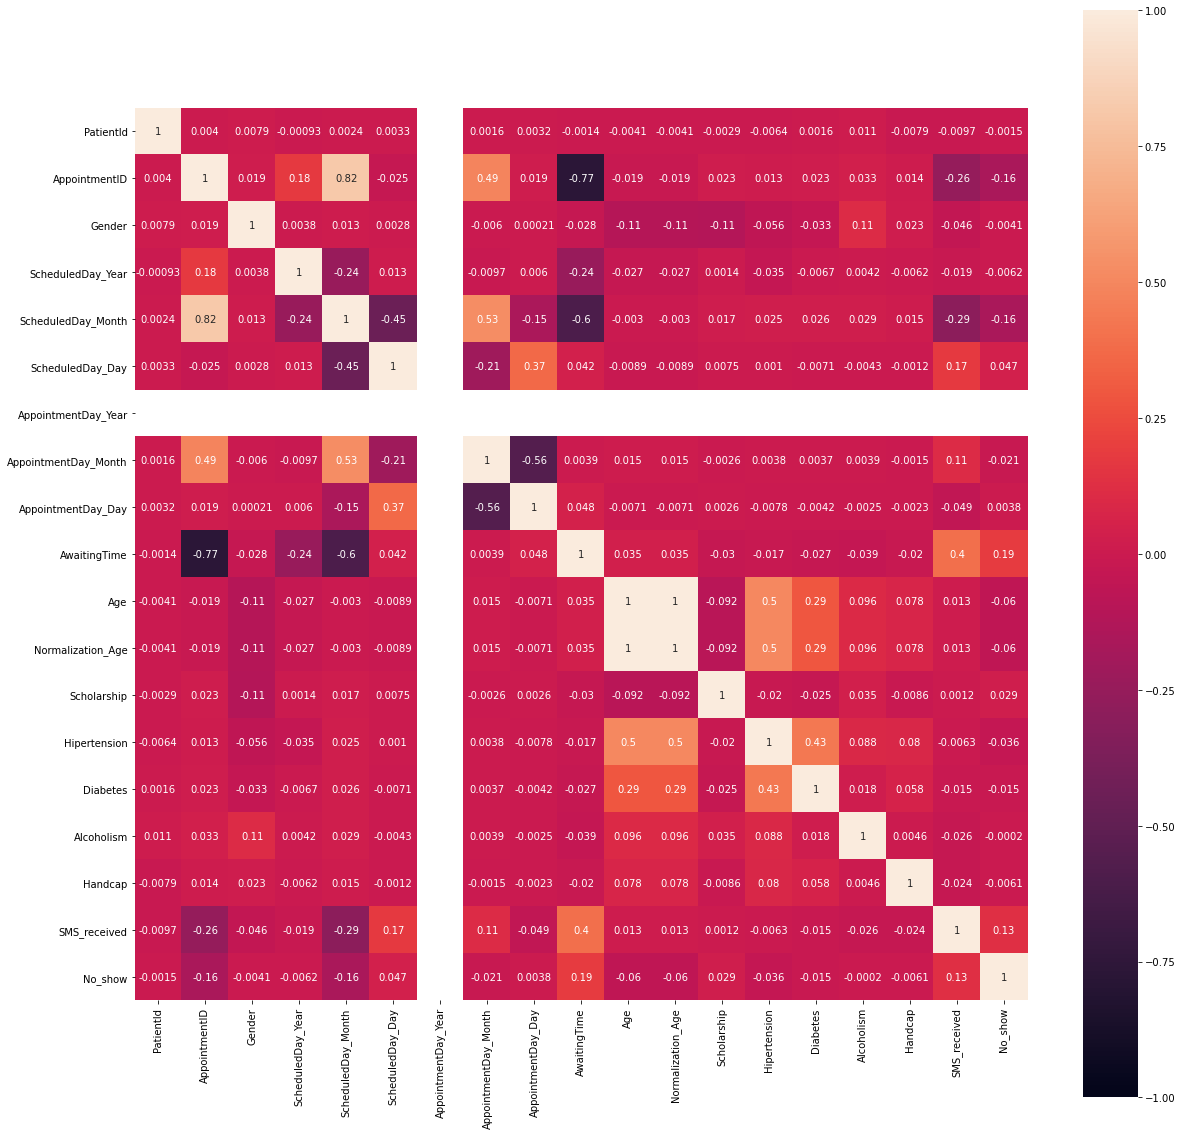

In [17]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), vmax=1.,vmin=-1.,annot=True,square=True)
plt.show()

*From the last line of the picture above, we can see the relationship between each feature and No_show. Age is dropped since Age and Normalization_Age express the same correlation.Then we drop the features whose correlation is lower than 0.01, the remaining features are AppointmentID, ScheduledDay_Month, ScheduledDay_Day, AppointmentDay_Month, AwaitingTime, Normalization_Age, Scholarship, Hipertension, Diabetes, SMS_received. At the same time, the correlation between the remaining features was observed through this figure, and no collinearity occurred, so all of them could be reserved.In addition, the feature Neighbourhood is temporarily reserved because it cannot be displayed in the above picture.*

In [18]:
data = data.drop(['PatientId', 'Gender', 'ScheduledDay_Year', 'ScheduledDay', 'AppointmentDay', 'AppointmentDay_Year', 'AppointmentDay_Day', 'Age', 'Alcoholism', 'Handcap' ],axis='columns')
data.shape

(110526, 12)

## B. Model Development

In [19]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler 
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [20]:
# split the data
X = data.drop('No_show',axis=1)
y = data['No_show']

X.shape, y.shape

((110526, 11), (110526,))

In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42) # splitting data in 70% train, 30%test

In [22]:
X_train.shape,y_train.shape

((77368, 11), (77368,))

In [23]:
X_test.shape,y_test.shape

((33158, 11), (33158,))

### Naïve Bayes

In [24]:
numerical_features= X.select_dtypes(include='number').columns.to_list()
numerical_features

['AppointmentID',
 'ScheduledDay_Month',
 'ScheduledDay_Day',
 'AppointmentDay_Month',
 'AwaitingTime',
 'Normalization_Age',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'SMS_received']

In [25]:
categorical_features= X.select_dtypes(exclude='number').columns.to_list()
categorical_features

['Neighbourhood']

*Since there is a non-numeric feature, we need a preprocessor.*

In [26]:
preprocessor = make_column_transformer((MinMaxScaler(), numerical_features), (ce.BinaryEncoder(), categorical_features))

In [27]:
# fitting the data to the classifier
naive_bayes = make_pipeline(preprocessor, GaussianNB())
naive_bayes.fit(X_train , y_train)
 
# redict on test data
y_predicted = naive_bayes.predict(X_test)
naive_bayes_predicted = y_predicted

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     26560
           1       0.33      0.24      0.28      6598

    accuracy                           0.75     33158
   macro avg       0.58      0.56      0.56     33158
weighted avg       0.72      0.75      0.74     33158


 F1:
 0.2784323994064764

 Precision score is:
 0.3282568429718049

 Recall score is:
 0.24173992118823887

 Specificity score is:
 0.8771084337349397

 Confusion Matrix:



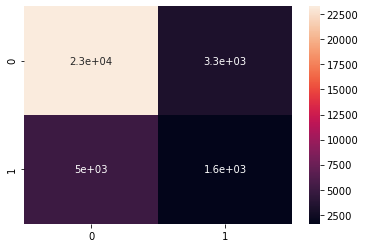

In [28]:
print("Classification Report is:\n",classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted), annot=True)
S = confusion_matrix(y_test,y_predicted)
specificity_score = S[0,0]/(S[0,0] + S[0,1])
print("\n F1:\n",f1_score(y_test,y_predicted))
print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Specificity score is:\n",specificity_score)
print("\n Confusion Matrix:\n")

*It can be seen from the above data that the value of accuracy is 75%, and the value of F1-score is 28%, indicating that the prediction made by the model in the current state is not accurate.*

## C. Model Evaluation & Comparison

### 1.Write a Function to detect Model’s Accuracy

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\Setup\\lib\\site-packages\\matplotlib\\pyplot.py'>

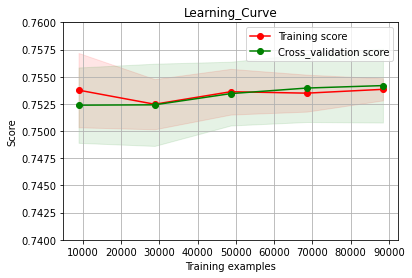

In [29]:
# import packages
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# define a function that plots the learning curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1.0,5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross_validation score')
    plt.legend(loc='best')
    return plt

plot_learning_curve(naive_bayes, 'Learning_Curve', X, y, ylim=(0.74, 0.76), cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42))

*As can be seen from the curves in the above figure, both the Naïve Bayes classification validation and training scores converge to a lower value, and underfitting occurs.*

### 2. Tune the model using GridSearchCV

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100) 
}

# set the scoring criteria for the GridSearchCV optimized model to accuracy
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid= make_pipeline(preprocessor, nbModel_grid)
best_model= nbModel_grid.fit(X_train, y_train)
nb_pred=best_model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [31]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26560
           1       0.00      0.00      0.00      6598

    accuracy                           0.80     33158
   macro avg       0.40      0.50      0.44     33158
weighted avg       0.64      0.80      0.71     33158


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0


In [32]:
# set the scoring criteria for the GridSearchCV optimized model to f1
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring='f1')
nbModel_grid= make_pipeline(preprocessor, nbModel_grid)
best_model= nbModel_grid.fit(X_train, y_train)
nb_pred=best_model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [33]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     26560
           1       0.32      0.18      0.23      6598

    accuracy                           0.76     33158
   macro avg       0.57      0.54      0.54     33158
weighted avg       0.72      0.76      0.73     33158


 F1:
 0.2283131938304352

 Precision score is:
 0.32449036581960344

 Recall score is:
 0.1761139739314944


*Through the above data comparison, it can be seen that using GridSearchCV to tune different parameters, the results are different. In general, using GridSearchCV for tuning does not change the Bayesian model much, which may be caused by the relatively large dataset.*

### 3. Compare the results of the Naïve Bayes classifier and SVM with the Decision tree model

### SVM

D:\Anaconda\Setup\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84     26560
           1       0.26      0.17      0.21      6598

    accuracy                           0.74     33158
   macro avg       0.53      0.52      0.52     33158
weighted avg       0.70      0.74      0.72     33158


 F1:
 0.20620239390642

 Precision score is:
 0.2566591422121896

 Recall score is:
 0.1723249469536223

 Specificity score is:
 0.8760165662650602

 Confusion Matrix:



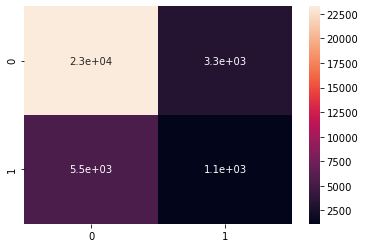

In [34]:
# applying SVC (Support Vector Classification)
from sklearn.svm import SVC

# svm = SVC(kernel='sigmoid', random_state=42, gamma = 'scale', C=1.0, probability = True)
svm = SVC(kernel='rbf', random_state=42, gamma = 'scale',max_iter=500, C=1.0, probability = True)
svm = make_pipeline(preprocessor, svm)
svm.fit(X_train , y_train)
 
# redict on test data
y_predicted = svm.predict(X_test)
svm_predicted = y_predicted

print("Classification Report is:\n",classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted), annot=True)
S = confusion_matrix(y_test,y_predicted)
specificity_score = S[0,0]/(S[0,0] + S[0,1])
print("\n F1:\n",f1_score(y_test,y_predicted))
print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Specificity score is:\n",specificity_score)
print("\n Confusion Matrix:\n")

### Decision tree

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     26560
           1       0.32      0.35      0.33      6598

    accuracy                           0.72     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.72      0.73     33158


 F1:
 0.33311475409836067

 Precision score is:
 0.3207520695944998

 Recall score is:
 0.3464686268566232

 Specificity score is:
 0.8177334337349398

 Confusion Matrix:



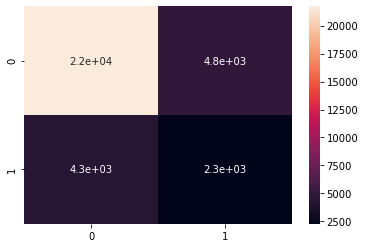

In [35]:
# applying Decision tree
from sklearn import tree

# create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree = make_pipeline(preprocessor, decision_tree)
decision_tree.fit(X_train , y_train)
 
# redict on test data
y_predicted = decision_tree.predict(X_test)
decision_tree_predicted = y_predicted

print("Classification Report is:\n",classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted), annot=True)
S = confusion_matrix(y_test,y_predicted)
specificity_score = S[0,0]/(S[0,0] + S[0,1])
print("\n F1:\n",f1_score(y_test,y_predicted))
print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Specificity score is:\n",specificity_score)
print("\n Confusion Matrix:\n")


*From the above data, we get the data for the three classifiers as follows:*

*Naïve Bayes: Accuracy -- 0.75, Sensitivity -- 0.24, Specificity -- 0.88*

*SVM: Accuracy -- 0.74, Sensitivity -- 0.17, Specificity -- 0.88*

*Decision tree: Accuracy -- 0.72, Sensitivity -- 0.35, Specificity -- 0.82*

*If Accuracy is used as the standard to judge the quality of the model, the three models are ranked from good to bad as follows:*

*Naïve Bayes > SVM > Decision tree*

*If Sensitivity is used as the standard to judge the quality of the model, the three models are ranked from good to bad as follows:*

*Decision tree > Naïve Bayes > SVM*

*If Specificity is used as the standard to judge the quality of the model, the three models are ranked from good to bad as follows:*

*Naïve Bayes = SVM > Decision tree*

### 4. Carry out a ROC analysis to compare the performance

In [36]:
from sklearn.metrics import roc_curve, auc

# define a function to plot the ROC curve
def acu_curve(y,prob,color,title):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color=color,
             lw=lw, label='ROC curve (AUC = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
 
    plt.show()

<Figure size 432x288 with 0 Axes>

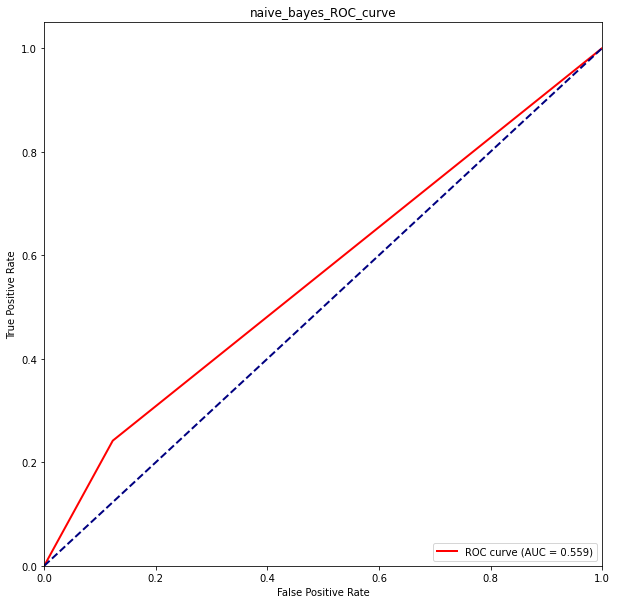

In [37]:
# plot the Naïve Bayes ROC curve
acu_curve(y_test, naive_bayes_predicted, 'red','naive_bayes_ROC_curve')

<Figure size 432x288 with 0 Axes>

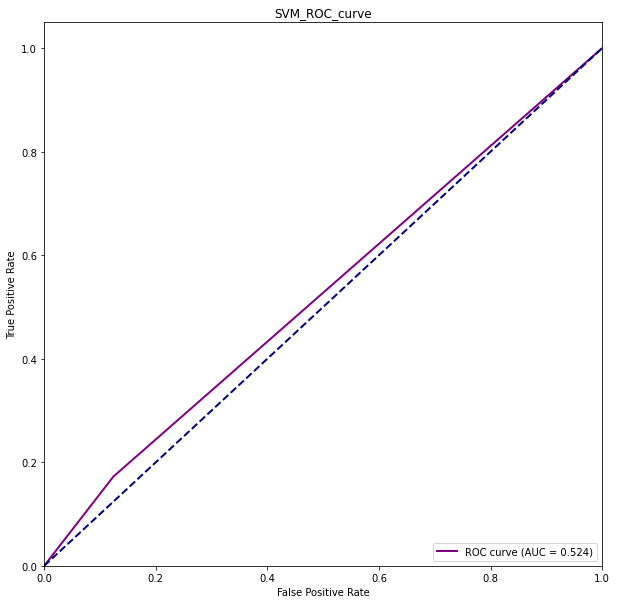

In [38]:
# plot the SVM ROC curve
acu_curve(y_test, svm_predicted, 'purple','SVM_ROC_curve')

<Figure size 432x288 with 0 Axes>

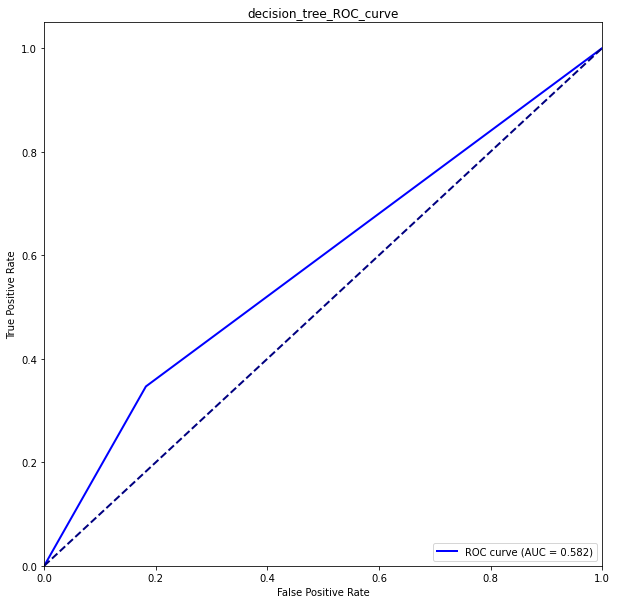

In [39]:
# plot the Decision Tree ROC curve
acu_curve(y_test, decision_tree_predicted, 'blue','decision_tree_ROC_curve')

*By comparing the ROC curves of the above three classifiers, it can be seen that their AUC values are all greater than 0.5, so they all perform better than random classifier. Taking the ROC curve as the evaluation standard, the performance of the three classifiers from good to bad is as follows:*

*Decision tree > Naïve Bayes > SVM*